<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [0]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#from sklearn.
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn import linear_model
linear_model.Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
  

import warnings
warnings.filterwarnings("ignore")

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


import os
import plotly.express as px




<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [0]:
# Load the data
# house = pd.read_csv('./housing.csv')




In [0]:

#load in the dataframe
house = pd.read_csv('housing.csv')

In [148]:
# look at the head of the data frame to understand number of Columns
# look at head of data to see how it is indexed

house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
#reset index to Id column
house = house.set_index('Id')

In [150]:
# make all columns lowercase
# view all of the column names
house.columns = [col.lower() for col in house.columns]
house.columns

Index(['mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street', 'alley',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garageyrblt',
       'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond',
       'paveddrive', 'wo

In [151]:
#look at data types
house.dtypes

mssubclass         int64
mszoning          object
lotfrontage      float64
lotarea            int64
street            object
                  ...   
mosold             int64
yrsold             int64
saletype          object
salecondition     object
saleprice          int64
Length: 80, dtype: object

In [152]:
house.shape

(1460, 80)

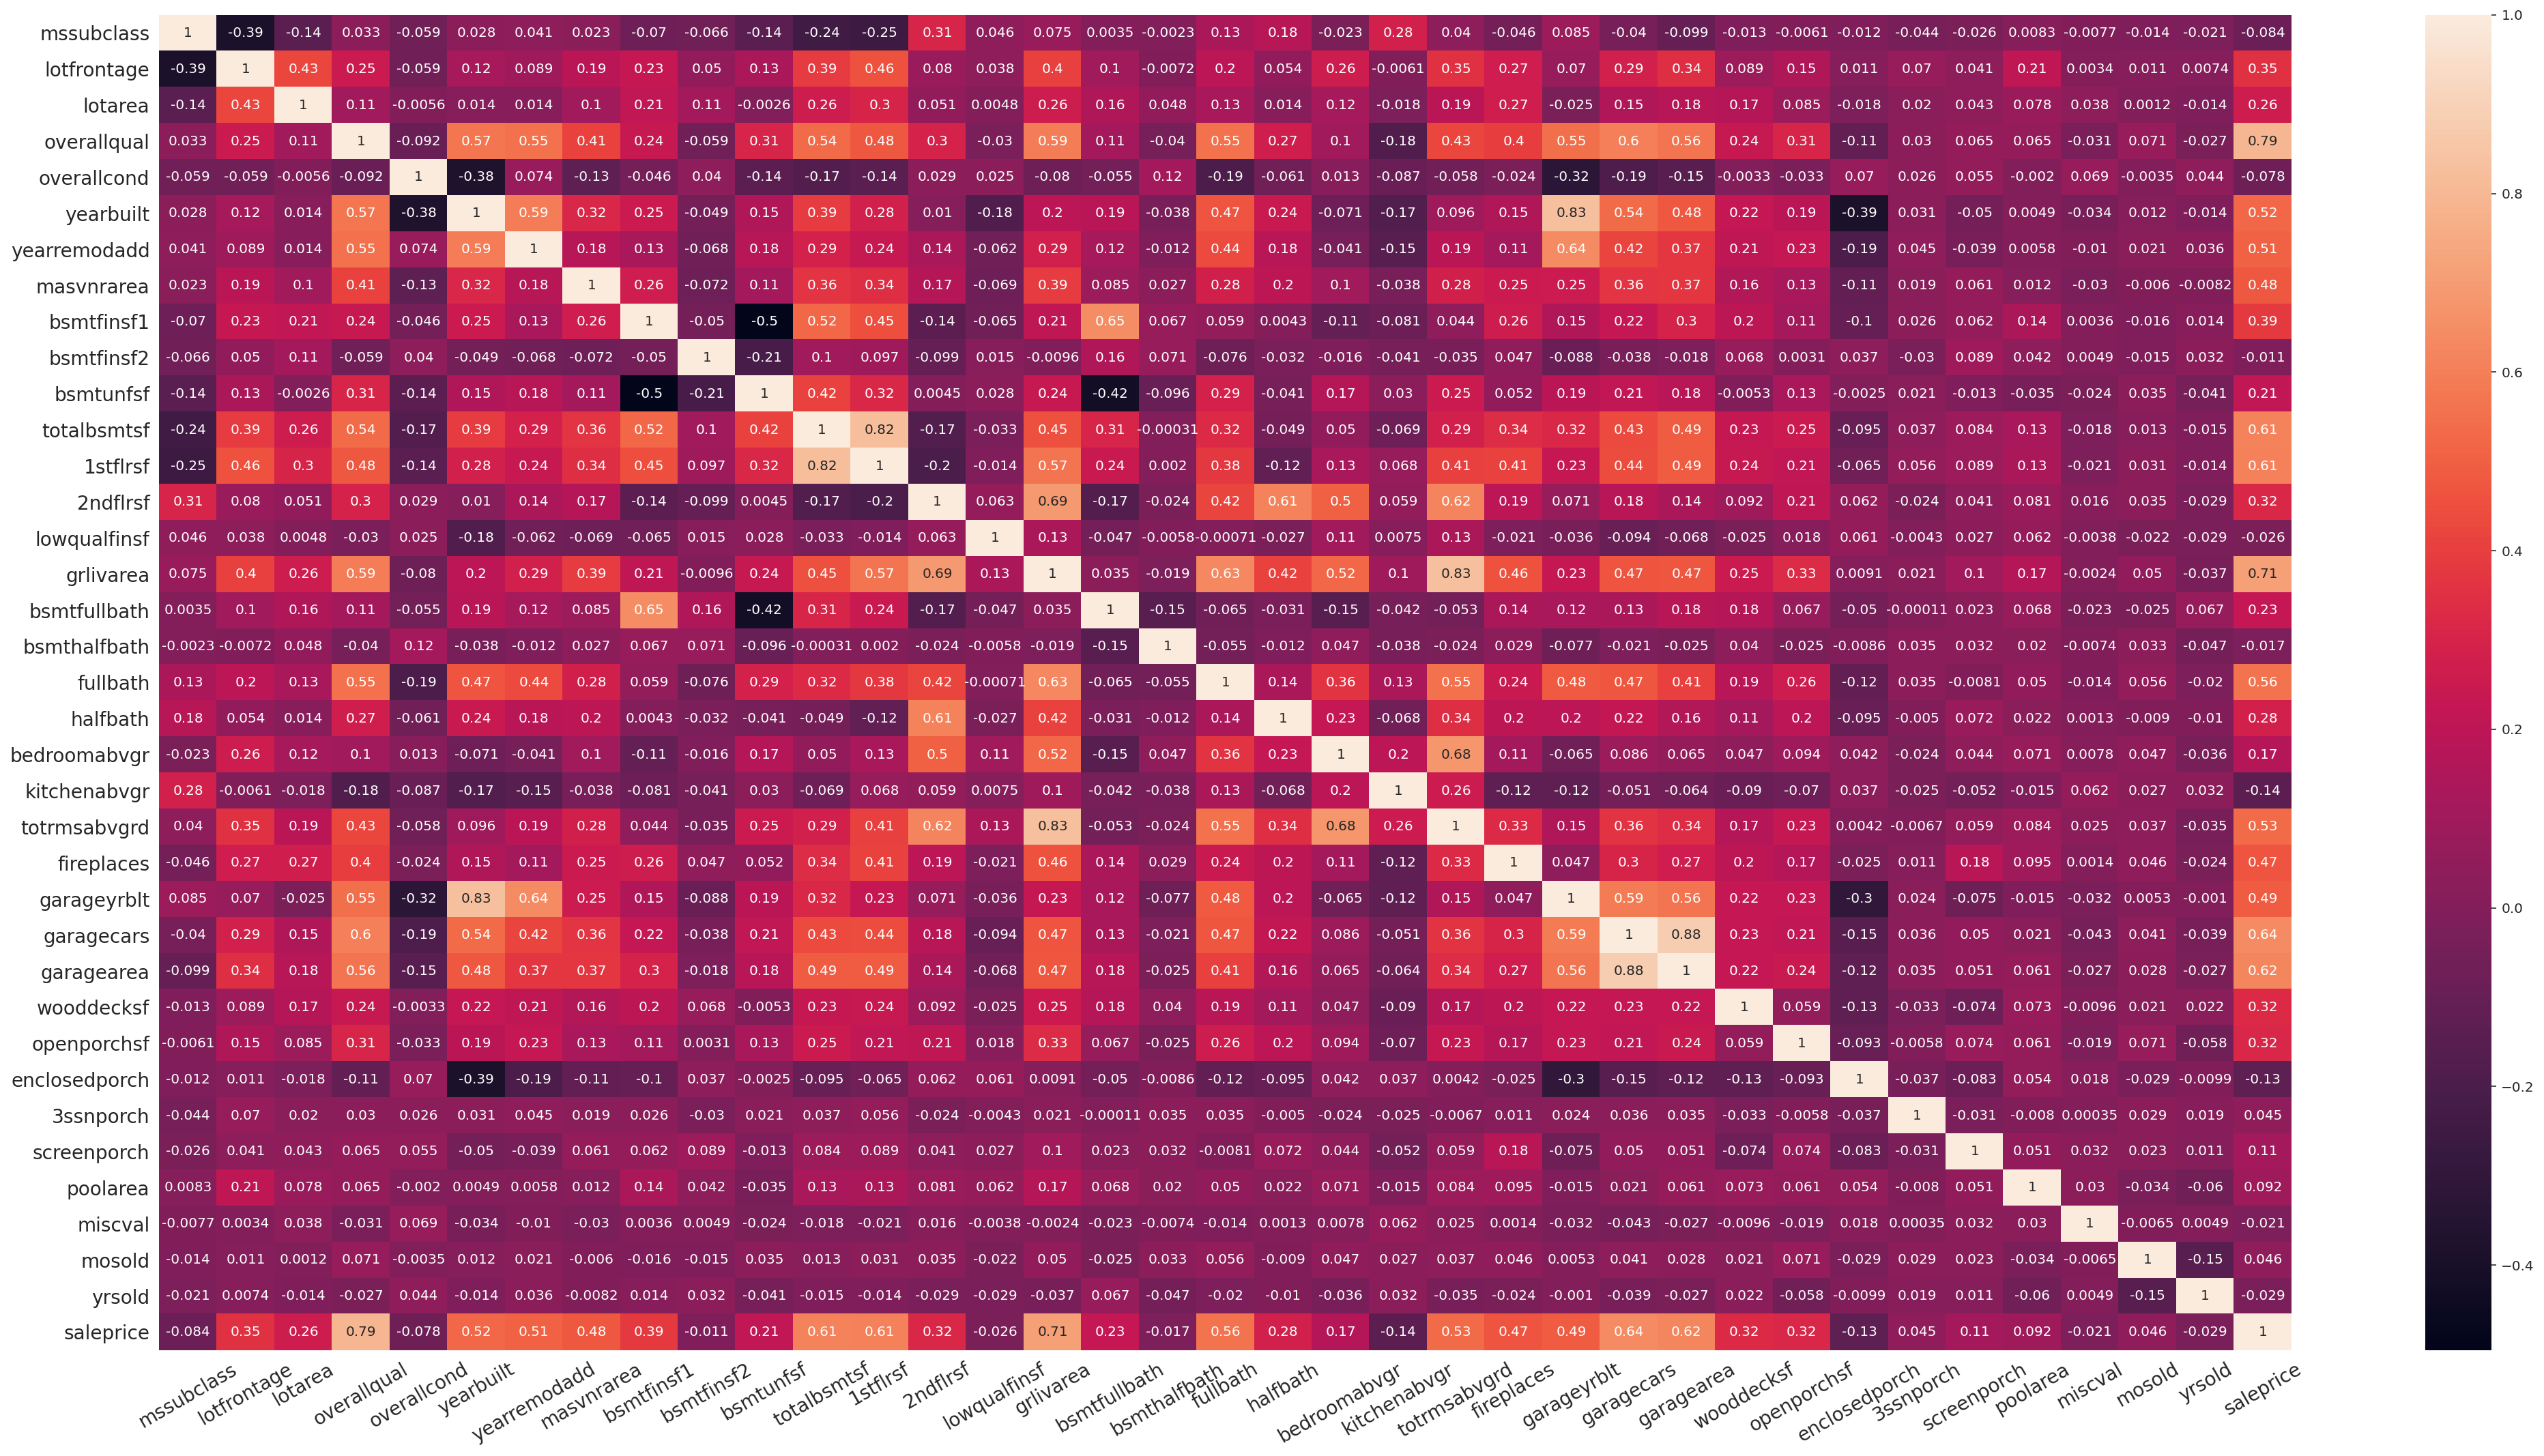

In [153]:
#look at the immediate correlation info before cleaning the data
def correlation_heat_map(house, triangle=False):
    corrs = house.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(35,18))
    
    if triangle:
        # Generate a mask for the upper triangle (taken from seaborn example gallery)
        mask = np.zeros_like(corrs, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

        # Plot the heatmap with seaborn.
        # Assign the matplotlib axis the function returns. This will let us resize the labels.
        ax = sns.heatmap(corrs, mask=mask, annot=True)
    else:
        ax = sns.heatmap(corrs, annot=True)
        
        
    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()


correlation_heat_map(house,triangle=False)

Text(0.5, 1.0, 'Correlation of features against sale price')

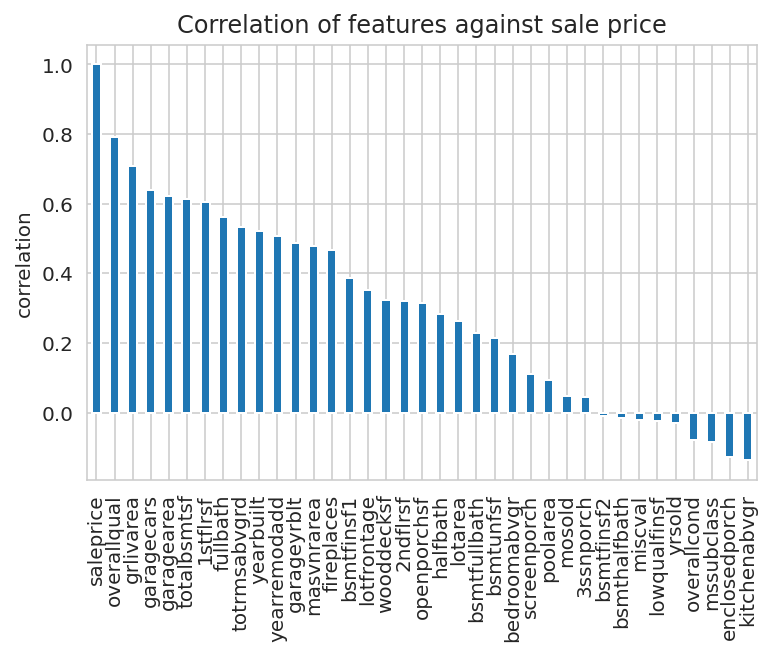

In [154]:
#zero in a little bit closer on the correlation with saleprice only
corr_saleprice = house.corr()['saleprice'].sort_values(ascending=False)
ax = corr_saleprice .plot(kind='bar')
ax.set_ylabel('correlation')
ax.set_title('Correlation of features against sale price')



In [0]:
#removing all non-residential data from my dataframe
house = house[house['mszoning'].isin(['RL','RM','FV','RH'])]


In [156]:
# explore missing values 

# count how many missing values there are for each column
missing_values = house.isna().sum() 

# Just get the columns with missing data 
missing_cols = missing_values[missing_values>0].index

missing_cols 


Index(['lotfrontage', 'alley', 'masvnrtype', 'masvnrarea', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'electrical', 'fireplacequ', 'garagetype', 'garageyrblt',
       'garagefinish', 'garagequal', 'garagecond', 'poolqc', 'fence',
       'miscfeature'],
      dtype='object')

In [157]:
# I want to look at these columns using transpose so that I can view multiple rows at once
# in order to asess what their NaN's should be changed to
house[['masvnrtype', 'masvnrarea', 'bsmtqual', 'bsmtcond', 'bsmtexposure',
       'bsmtfintype1', 'bsmtfintype2', 'electrical', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagequal', 'garagecond']].T

Id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,...,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
masvnrtype,BrkFace,None,BrkFace,None,BrkFace,None,Stone,Stone,None,None,None,Stone,None,Stone,BrkFace,None,BrkFace,None,None,None,BrkFace,None,BrkFace,None,None,Stone,None,Stone,None,None,None,None,None,BrkFace,Stone,None,BrkFace,None,None,BrkFace,...,BrkFace,None,BrkFace,None,None,Stone,BrkFace,None,Stone,BrkFace,None,None,None,BrkFace,None,BrkFace,None,Stone,None,BrkFace,None,BrkFace,Stone,None,BrkFace,None,BrkFace,BrkFace,None,None,None,Stone,BrkFace,None,None,None,Stone,None,None,None
masvnrarea,196,0,162,0,350,0,186,240,0,0,0,286,0,306,212,0,180,0,0,0,380,0,281,0,0,640,0,200,0,0,0,0,0,246,132,0,650,0,0,101,...,420,0,170,0,0,243,448,0,294,310,0,0,0,318,0,237,0,426,0,96,0,147,160,0,106,0,189,438,0,0,0,194,80,0,0,0,119,0,0,0
bsmtqual,Gd,Gd,Gd,TA,Gd,Gd,Ex,Gd,TA,TA,TA,Ex,TA,Gd,TA,TA,TA,NaN,TA,TA,Ex,TA,Gd,Gd,TA,Gd,TA,Ex,TA,TA,TA,Ex,TA,Ex,Ex,Gd,TA,TA,NaN,TA,...,TA,Gd,Gd,Gd,TA,TA,Gd,TA,TA,Gd,Gd,Gd,TA,Gd,TA,TA,TA,Ex,TA,TA,Ex,Gd,Ex,TA,Gd,TA,TA,Gd,Fa,Gd,Gd,Gd,Gd,Gd,Gd,Gd,Gd,TA,TA,TA
bsmtcond,TA,TA,TA,Gd,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,NaN,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,NaN,TA,...,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,Gd,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,Gd,TA,TA
bsmtexposure,No,Gd,Mn,No,Av,No,Av,Mn,No,No,No,No,No,Av,No,No,No,NaN,No,No,Av,No,No,No,Mn,No,Mn,No,Gd,No,No,Av,No,No,Av,No,No,No,NaN,No,...,No,No,Av,Av,No,No,No,No,No,No,Av,No,No,No,No,No,No,Av,No,No,No,Av,Av,No,Av,Gd,No,No,No,Av,No,No,Gd,No,No,No,No,No,Mn,No
bsmtfintype1,GLQ,ALQ,GLQ,ALQ,GLQ,GLQ,GLQ,ALQ,Unf,GLQ,Rec,GLQ,ALQ,Unf,BLQ,Unf,ALQ,NaN,GLQ,LwQ,Unf,Unf,Unf,GLQ,Rec,Unf,BLQ,GLQ,BLQ,Unf,Unf,Unf,Rec,GLQ,Unf,Unf,Rec,GLQ,NaN,Rec,...,ALQ,ALQ,GLQ,Unf,ALQ,Unf,GLQ,BLQ,BLQ,BLQ,Unf,LwQ,Unf,Unf,ALQ,Unf,ALQ,GLQ,GLQ,GLQ,Unf,GLQ,GLQ,Unf,Unf,LwQ,Rec,GLQ,Unf,GLQ,Unf,Unf,GLQ,Unf,GLQ,Unf,ALQ,GLQ,GLQ,BLQ
bsmtfintype2,Unf,Unf,Unf,Unf,Unf,Unf,Unf,BLQ,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Unf,NaN,Unf,Unf,Unf,Unf,Unf,Unf,ALQ,Unf,Rec,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Unf,NaN,Unf,...,Unf,Unf,Unf,Unf,Rec,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Rec,Unf,Unf,Unf,Unf,Unf,Rec,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Unf,Rec,Unf,Rec,LwQ
electrical,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,FuseF,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,FuseA,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,FuseF,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,FuseP,SBrkr,...,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,FuseA,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,FuseA,SBrkr,SBrkr,SBrkr,SBrkr,FuseF,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,SBrkr,FuseA,SBrkr
garagetype,Attchd,Attchd,Attchd,Detchd,Attchd,Attchd,Attchd,Attchd,Detchd,Attchd,Detchd,BuiltIn,Detchd,Attchd,Attchd,Detchd,Attchd,CarPort,Detchd,Attchd,BuiltIn,Attchd,Attchd,Attchd,Attchd,Attchd,Detchd,Attchd,Attchd,Detchd,Attchd,Attchd,Attchd,Attchd,BuiltIn,Attchd,Attchd,Detchd,NaN,Attchd,...,Attchd,Attchd,Attchd,Attchd,Detchd,Detchd,Attchd,Attchd,Attchd,Attchd,BuiltIn,Attchd,Detchd,Attchd,Attchd,Attchd,Detchd,Attchd,Attchd,Attchd,Detchd,Attchd,Attchd,Detchd,Attchd,Detchd,Attchd,Attchd,Detchd,NaN,NaN,Attchd,Basment,NaN,Attchd,Attchd,Attchd,Attchd,Attchd,Attchd
garageyrblt,2003,1976,2001,1998,2000,1993,2004,1973,1931,1939,1965,2005,1962,2006,1960,1991,1970,1967,2004,1958,2005,1930,2002,1976,1968,2007,2005,2008,1957,1920,1966,2007,1959,2005,2004,1995,1954,1953,NaN,1965,...,1968,1977,2003,1966,1970,1960,1994,1962,1940,1981,2005,1976,1928,2000,1977,1962,1974,2008,1957,1979,1993,2004,2008,1916,2004,1990,1962,1995,1950,NaN,NaN,2008,2005,NaN,2004,1999,1978,1941,1950,1965


In [158]:
# replace missing values

keep_cols = missing_values[missing_values<250].index
house = house[list(keep_cols)]
missing_values = house.isna().sum()

# get cols to fill with data description mode or numeric mean values
missing_cols = missing_values[missing_values>0].index
missing_cols

Index(['masvnrtype', 'masvnrarea', 'bsmtqual', 'bsmtcond', 'bsmtexposure',
       'bsmtfintype1', 'bsmtfintype2', 'electrical', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagequal', 'garagecond'],
      dtype='object')

In [0]:
# helper function to separate columns between floats and strings
def isfloat(value):
  
    try:
      float(value)
      return True
    except ValueError:
        return False

# separate into object and float cols 
cols, vals = (house.dtypes == 'object').index, (house.dtypes == 'object').values
str_cols = [c for c,v in zip(cols,vals) if v ]
float_cols = [c for c,v in zip(cols,vals) if not v ]



for col in missing_cols:
   
    if col in float_cols:
        # create mask of non missing values in this missing value column
        mask = house[col].apply(lambda x: isfloat(x) )
        # just look at non missing values, non_miss_vals is a series
        non_miss_vals = house[mask][col]

        # get the mean for the column
        replace_val = non_miss_vals.mean()
    
    if col in str_cols:
        mask = house[col].apply(lambda x: type(x)==str and x!= 'None')
        non_miss_vals = house[mask][col]
        #print(non_miss_vals)
        replace_val = non_miss_vals.mode()[0]

    # replace all missing values with col mean or mode
    house.loc[~mask, col] = replace_val    
   


In [160]:
# check to see if there are any NA's left
x = house.isna().sum()>0
x[x]

masvnrarea     True
garageyrblt    True
dtype: bool

In [0]:
#need to deal with these two individually
val_mode = house['masvnrarea'].value_counts().values[0]
house.loc[house['masvnrarea'].isna(),'masvnrarea'] = val_mode

In [0]:
year_mode = house['garageyrblt'].value_counts().values[0]
house.loc[house['garageyrblt'].isna(),'garageyrblt'] = year_mode

In [163]:
# check to see if all missing vals are gone
house.isna().sum().sum()


0

# Remove outliers

count      1450.000000
mean     181654.942069
std       79176.485241
min       37900.000000
25%      130000.000000
50%      163945.000000
75%      214000.000000
max      755000.000000
Name: saleprice, dtype: float64

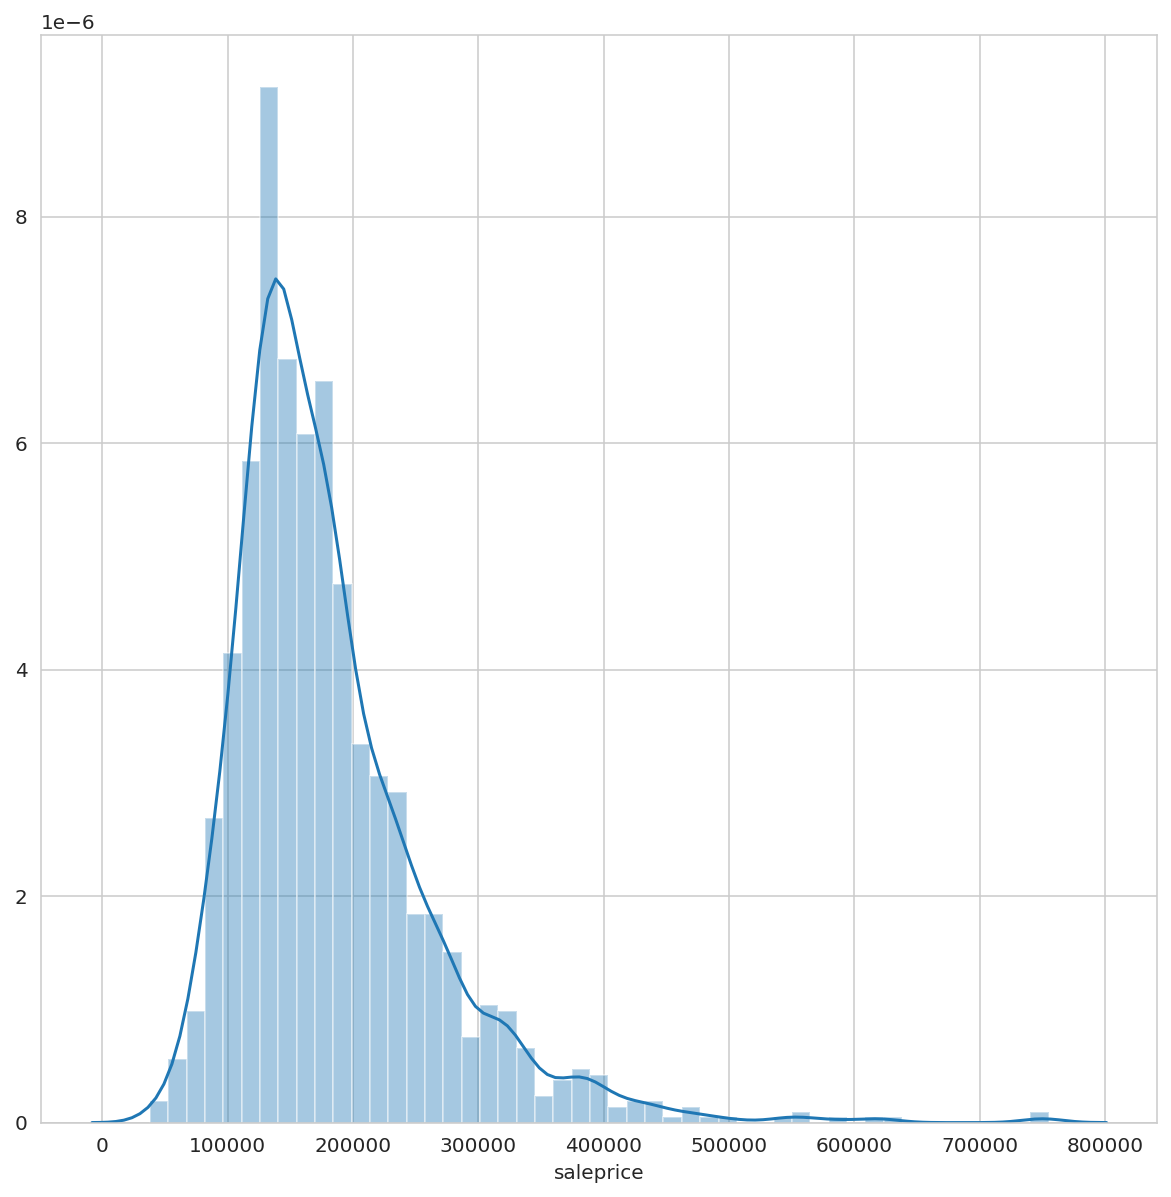

In [164]:
# plotting the target in order to see/demostrate - visually - the skew of the sales prices.
# it is right sweked = positively skewed
plt.figure(figsize=(10,10))
sns.distplot(house['saleprice'])

# learning a little bit more about the target
# this shows me the mean or average price
# this shows me the minimum and maximum values and ect
house['saleprice'].describe()

In [165]:
# remove outliers based on location being 1.5 times the interquartile range below the lower quartile or
# being 1.5 times the interquartile range above the upper quartile

def remove_outliers(column_name,data):
    quantile_1=data[column_name].quantile(0.25)
    quantile_3=data[column_name].quantile(0.75)
    iqr=quantile_3-quantile_1
    lower=quantile_1-1.5*iqr
    upper=quantile_3+1.5*iqr
    data=data[(data[column_name]>lower)& (data[column_name]<upper)]
    return data
before = house.shape[0]
house = remove_outliers('saleprice', house)
after = house.shape[0]

# print the number of outliers removed
print('removed',before-after,'outliers')


removed 63 outliers


# Start Modeling with train test split

In [0]:
# split the data into train data and test data
train = house[house['yrsold'] < 2010]
test = house[house['yrsold'] == 2010]

# set the target, y, as salesprice in train data
# drop the salesprice column from the total considered features, X. 
y_train = train['saleprice']
X_train = train.drop('saleprice', axis=1)

# set X and y for test data
y_test = test['saleprice']
X_test = test.drop('saleprice', axis=1)

In [0]:
# created a list of fixed and renovatable = unfixed features
# manually selected the fixed features according to the data description file

fixed_cols = ['mssubclass', 'mszoning','lotarea', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'yearbuilt', 'foundation', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf', 'lowqualfinsf', 'grlivarea', 'fireplaces', 'garagetype', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch',
       'screenporch', 'poolarea', 'mosold', 'yrsold', 'saletype', 'salecondition',
       
    ]


#defaulted all of the non-fixed features as all the features that are not contained in the fixed list
unfixed_cols = [x for x in X_train.columns if x not in fixed_cols]

# saved the lists into 2 separate data frames
X_train_fixed = X_train[fixed_cols]
X_train_unfixed = X_train[unfixed_cols]
X_test_fixed = X_test[fixed_cols]
X_test_unfixed = X_test[unfixed_cols]

# Get dummies for categorical data




In [168]:
# get dummies for fixed categorical data in the test and train sets
X_train_fixed = pd.get_dummies(X_train_fixed)
X_test_fixed = pd.get_dummies(X_test_fixed)

# look at how this changes the shape of the df
print(X_train_fixed.shape)

(1221, 129)


# Investigate correlation between saleprice and inputs, to decide which features to use for modeling

In [169]:

# only use variables with high correlation between saleprice

# mask out columns that are not apart of my fixed columns
high_corr_fixed = corr_saleprice[corr_saleprice.index.isin(fixed_cols)]

# only use the ones with more than .3 correlation (in absolute value)
high_corr = high_corr_fixed[high_corr_fixed.abs() >.3]
print(high_corr)

# also have to be in the training set
high_corr_vars = [x for x in list(high_corr.index) if x in X_train_fixed.columns]

#print high_corr_vars and the number of dropped variables, type of high_corr_vars, the first one.
#print number of high_corr_vars still in the training set
print(high_corr_vars)
print('dropped',len(fixed_cols)-len(high_corr_vars), 'variables' )
print(type(high_corr_vars[0]))
print(len(high_corr_vars), 'variables in the training set')

#X_train_fixed_vals = X_train_fixed_vals[high_corr_vars]
#X_test_fixed_vals = X_train_fixed_vals[high_corr_vars]

#subset on the numeric data
numeric_vars = [ 'grlivarea','1stflrsf', 'garagearea', '2ndflrsf', 'yearbuilt', 'totalbsmtsf','garageyrblt', 'openporchsf', 'wooddecksf']
X_train_fixed_num = X_train_fixed[numeric_vars]
X_test_fixed_num = X_test_fixed[numeric_vars]
print(X_train_fixed_num.shape)

grlivarea      0.708624
garagecars     0.640409
garagearea     0.623431
totalbsmtsf    0.613581
1stflrsf       0.605852
yearbuilt      0.522897
garageyrblt    0.486362
fireplaces     0.466929
bsmtfinsf1     0.386420
wooddecksf     0.324413
2ndflrsf       0.319334
openporchsf    0.315856
Name: saleprice, dtype: float64
['grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', '1stflrsf', 'yearbuilt', 'garageyrblt', 'fireplaces', 'bsmtfinsf1', 'wooddecksf', '2ndflrsf', 'openporchsf']
dropped 27 variables
<class 'str'>
12 variables in the training set
(1221, 9)


In [170]:
X_train_fixed_num.columns

Index(['grlivarea', '1stflrsf', 'garagearea', '2ndflrsf', 'yearbuilt',
       'totalbsmtsf', 'garageyrblt', 'openporchsf', 'wooddecksf'],
      dtype='object')

In [171]:
X_train_fixed_num.head()

,grlivarea,1stflrsf,garagearea,2ndflrsf,yearbuilt,totalbsmtsf,garageyrblt,openporchsf,wooddecksf
Id,,,,,,,,,
1,1710,856,548,854,2003,856,2003.0,61,0
2,1262,1262,460,0,1976,1262,1976.0,0,298
3,1786,920,608,866,2001,920,2001.0,42,0
4,1717,961,642,756,1915,756,1998.0,35,0
5,2198,1145,836,1053,2000,1145,2000.0,84,192


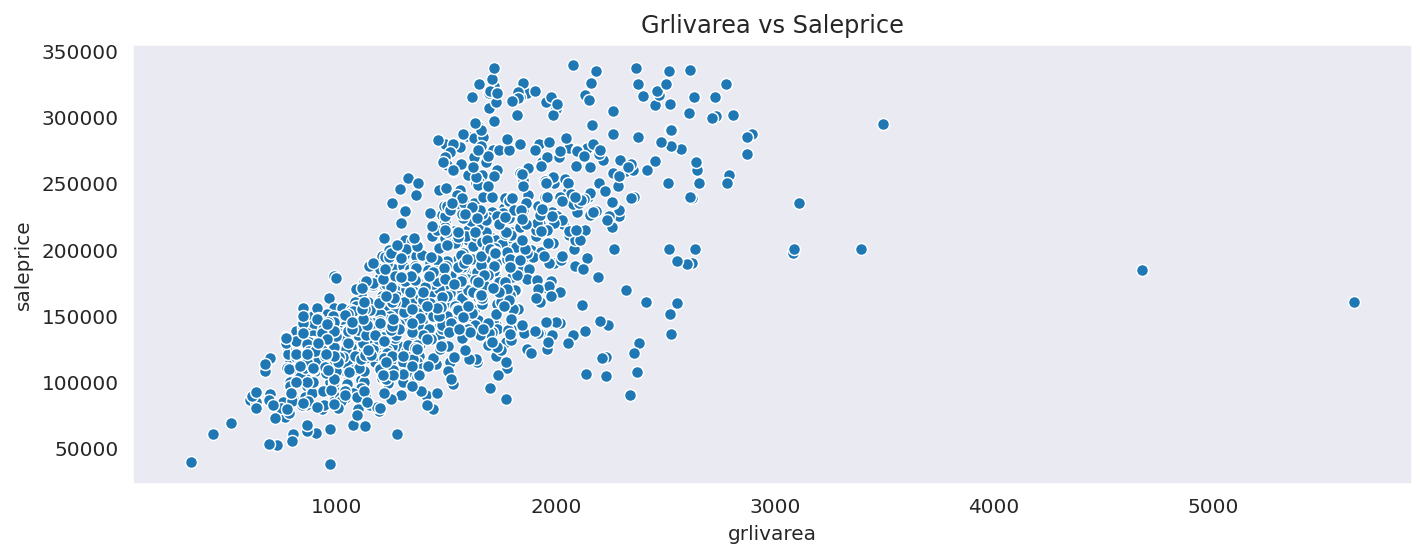

In [172]:
# visualising my top ranked feature and it's correlation with saleprice
sns.set_style(style='dark')
plt.figure(figsize=(10,4))
sns.scatterplot(x=X_train_fixed_num['grlivarea'],y=y_train)
plt.title("Grlivarea vs Saleprice")
plt.tight_layout()

In [173]:
# visually my next two highly ranked features
# notcing the close relationship between them
fig = px.scatter(X_train_fixed, x= X_train_fixed_num['1stflrsf'], y=y_train, color=X_train_fixed_num['garagearea'])
fig.show()

# MODEL!!!

In [0]:
# selecting a linear model and running my first test on my subseted high corr numeric features
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

ln = LinearRegression(fit_intercept=True)

#linreg.fit(X_train_fixed_num, y_train)
ln.fit(X_train_fixed_num, y_train)

# make predictions 
preds = ln.predict(X_test_fixed_num)




Text(0.5, 1.0, 'Relative Prediction Error')

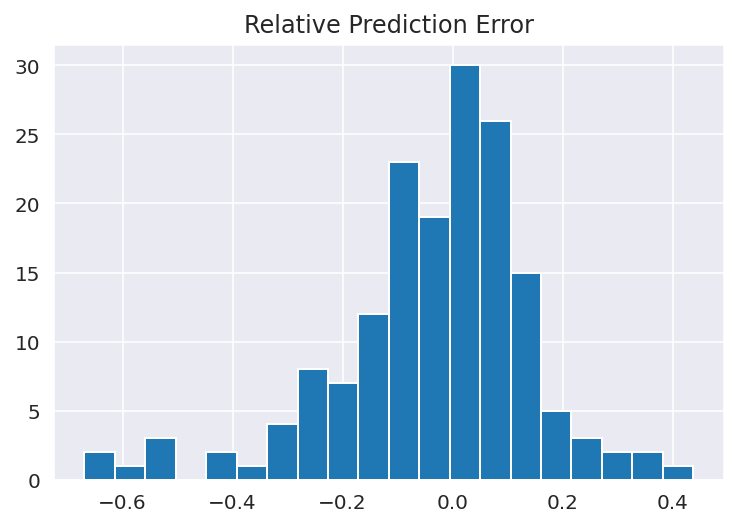

In [175]:
#looking at the actual differences and relative differences between my
#predictions and my actuals
dif_price = y_test.values - preds
rel_price = dif_price/y_test

ax = rel_price.hist(bins=20)
ax.set_title('Relative Prediction Error')




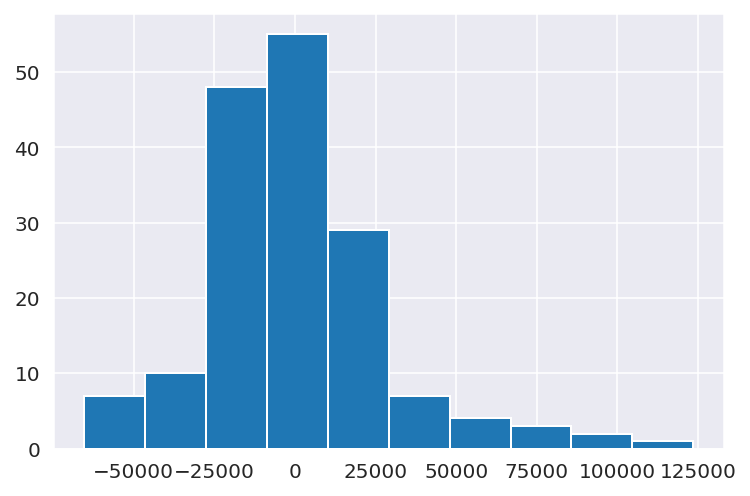

In [176]:
#plotting actual diference in my predicted prices to my actual prices
pd.Series(dif_price).hist()


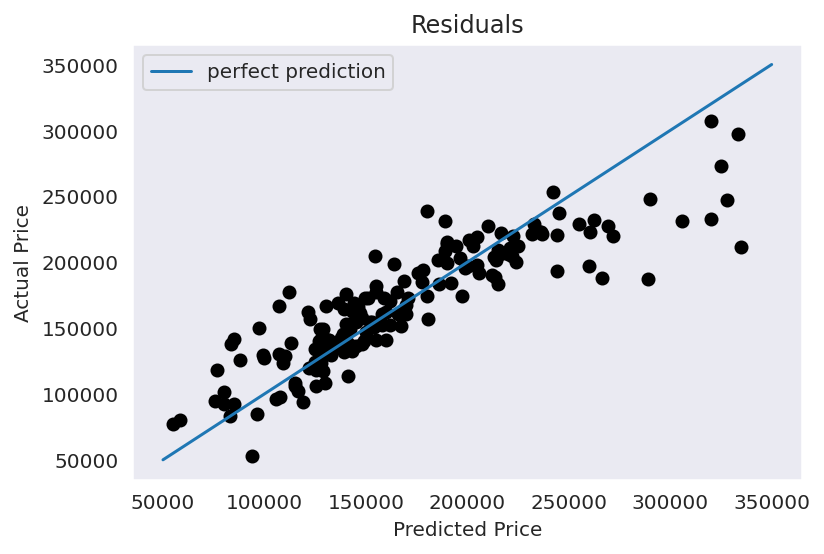

In [177]:

# Plot outputs
ax = plt.scatter(y_test.values, preds,  color='black')
plt.plot([50000,350000],[50000,350000],label = 'perfect prediction')
plt.ylabel('Actual Price')
plt.xlabel('Predicted Price')
plt.title('Residuals')
plt.legend()
plt.show()

In [178]:
# consistently overpredicting price when prediction is above 250000

#baseline rmse
actuals = [np.mean(y_train) for i in range(len(y_train))]
baseline = np.sqrt(mean_squared_error(y_train, actuals))

baseline

58433.617167028366

# Evaluate Model

In [179]:
# first I ran a linear regression model on my X_train_fixed numerics
# these are the features i selected through my extensive process of feature elimination('selection')


#set my model as linear regression  
model = linear_model.LinearRegression()
    
#performed cross-validation
score = cross_val_score(model, X_train_fixed_num, y_train, cv=5)


print("Cross-validated score:", score)
print("Mean CV R2:", np.mean(score))
print('Std CV R2:', np.std(score))


#I see there is big variance in my crossval scores
#this indicates presence of outliers in my train set
#it also suggests that I might have removed some good highly correlated features unnecesarily
# also the mean CV score is not very high

Cross-validated score: [0.75132078 0.70697971 0.72217491 0.73324593 0.43823112]
Mean CV R2: 0.6703904914884944
Std CV R2: 0.1169776786667099


In [180]:

# next I look at the same train features, this time using lasso

model = linear_model.Lasso()
    
# Perform cross-validation
score = cross_val_score(model, X_train_fixed_num, y_train, cv=5)


print("Cross-validated score:", score)
print("Mean CV R2:", np.mean(score))
print('Std CV R2:', np.std(score))

#my results are pretty similar, so I decide to go back one step
#and instead test my X_train_fixed features, before i subsetted that list further down. 

Cross-validated score: [0.75132083 0.70697958 0.72217333 0.73324631 0.43823171]
Mean CV R2: 0.6703903543001634
Std CV R2: 0.11697734637122822


In [181]:
#checking to see if the shapes match up
print(X_test_fixed.shape)
print(X_train_fixed.shape)
print(y_test.shape)
print(y_train.shape)


(166, 106)
(1221, 129)
(166,)
(1221,)


In [182]:
#executing fancy manuevers to add the removed vars back in as 0s for even stevens
additional = X_train_fixed.columns.difference(X_test_fixed.columns)
for x in additional:
  X_test_fixed[x] = 0
X_test_fixed = X_test_fixed[X_train_fixed.columns]

X_test_fixed.shape

(166, 129)

In [183]:
# running the X_train_fixed features 
#without further process of elimination feature selection through a lasso model 
model = linear_model.Lasso()
    
model.fit(X_train_fixed, y_train)
y_hat = model.predict(X_test_fixed)
model.score(X_test_fixed, y_test)
#this generates a much better r 2 score

0.8443413655977352

In [0]:
# using elasticnet and gridsearch, elasticnet's best estimator to find my best model
# changed the alphas, scaling them up, tried 1,3 and 5 first and continued to increase them
EN = ElasticNet()
parameter = {'alpha':[7,10,15], 
             'l1_ratio':[0.0,0.5,1.0]}
ENGrid = GridSearchCV(EN, param_grid=parameter, cv=5 ).fit( X_train_fixed, y_train,)




In [185]:
# the l1_ratio being at 1, means that lasso penalty is fully applied, the ridge penalty not applied at all
# 15 is chosen for best model when the highest alpha listed is 15
# I will try higher alphas to see if a higher one will be still better
ENGrid.best_estimator_

ElasticNet(alpha=15, copy_X=True, fit_intercept=True, l1_ratio=1.0,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
Best_model = ENGrid.best_estimator_

In [187]:
Best_model.fit(X_train_fixed, y_train)
#Make predictions 
preds = Best_model.predict(X_test_fixed)
Best_model.score(X_test_fixed, y_test)
#this is a much better level of performance of my model

0.8521582991827816

In [188]:
#rmse of best model
np.sqrt(mean_squared_error(y_test, preds))
#the root mean squared error is also much lower

22633.310938584356

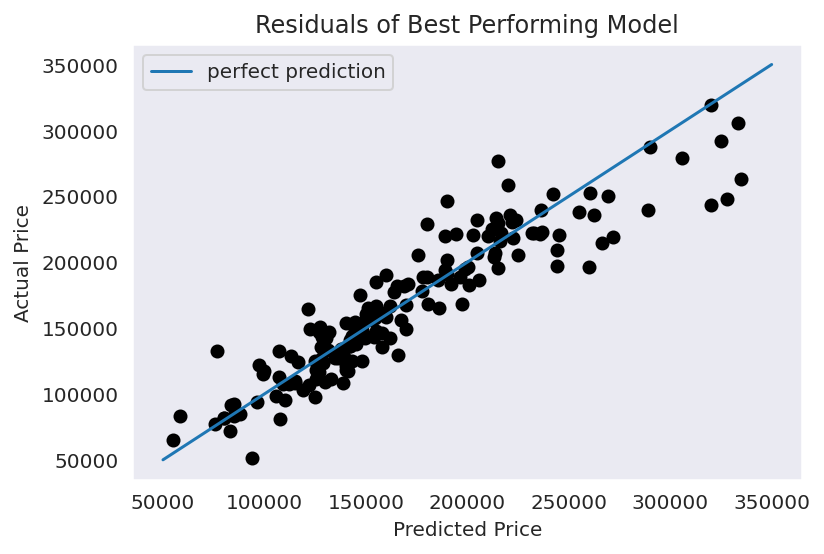

In [189]:
# Plot outputs
ax = plt.scatter(y_test.values, preds,  color='black')
plt.plot([50000,350000],[50000,350000],label = 'perfect prediction')
plt.ylabel('Actual Price')
plt.xlabel('Predicted Price')
plt.title('Residuals of Best Performing Model')
plt.legend()
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [0]:
#create my training set based on the residuals of my last test
preds_train = Best_model.predict(X_train_fixed)
preds_test = Best_model.predict(X_test_fixed)

In [0]:
#set the residulas as my new target
y_train_residuals= y_train - preds_train
y_test_residuals= y_test - preds_test

In [192]:
# get dummies for unfixed categorical data in the test and train sets
X_train_unfixed = pd.get_dummies(X_train_unfixed)
X_test_unfixed = pd.get_dummies(X_test_unfixed)

# look at how this changes the shape of the df
print(X_train_unfixed.shape)

(1221, 136)


In [193]:
#executing fancy manuevers again to add the removed vars back in as 0s for even stevens
additional = X_train_unfixed.columns.difference(X_test_unfixed.columns)
for x in additional:
  X_test_unfixed[x] = 0
X_test_unfixed = X_test_unfixed[X_train_unfixed.columns]

X_test_unfixed.shape

(166, 136)

In [194]:
# using a Linear regression model to predict my new target 
#ln = LinearRegression(fit_intercept=True)
model = linear_model.Lasso()
#linreg.fit(X_train_unfixed, y_train_unfixed)
model.fit(X_train_unfixed, y_train_residuals)

# make predictions 
pred_residuals = model.predict(X_test_unfixed)
r2 =model.score(X_test_unfixed, y_test_residuals)
print(r2)

0.27761430690208255


The r2 of the model trained on the fixed features had was .85, which means that 85% of the variance can be attributed to these fixed features.  The remaining unfixed features were able to explain 28% of the left over variance.  

# Investigate which unfixed features have the biggest impact on final sales price

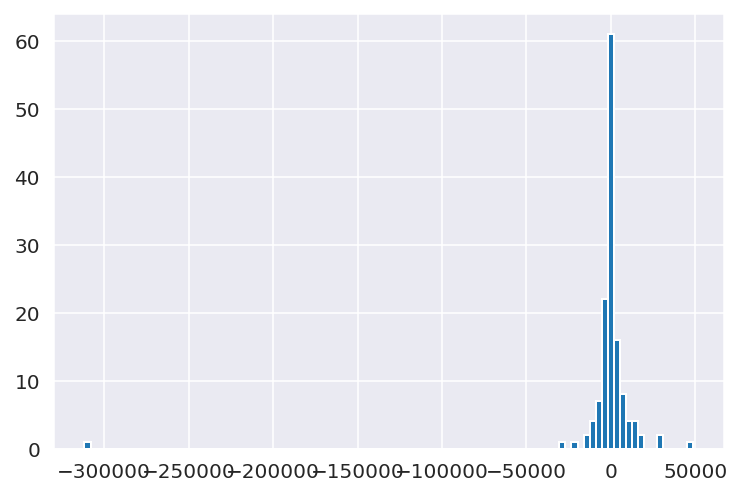

In [195]:
coeffs = pd.Series(model.coef_)
coeffs.index = X_test_unfixed.columns
coeffs.hist(bins=100)

# I can see there is one significant outlier 
# and there are a lot of renovatable features that don't impact sale price at all
# there are also several features above and below zero price cahange
# I want to get a better look at them and find the positive and negative outliers
# that most signifciantly impact saleprice acoording to my model

In [196]:
coeffs = coeffs.sort_values()
coeffs

# looking at this confirms my supicions regarding outliers

roofmatl_ClyTile    -311633.852917
functional_Sev       -29624.002803
exterior2nd_Stone    -22714.403170
functional_Maj2      -13918.037609
heating_OthW         -13634.137129
                         ...      
garagequal_Ex         16882.858024
roofmatl_WdShngl      18785.077686
heating_Wall          27212.744304
bsmtcond_Po           27287.921935
roofmatl_Membran      48662.280735
Length: 136, dtype: float64

In [0]:
# now I will segment them into features that increase or decrease the sale price by $15,000
# I would consider that level of change in deciding whether to by a house that needed rennovations
# I would compare the cost of doing a rennovation to how much it will increae the potential saleprice I could be paid
# in deciding whether it is worth it to buy this house and pay to renovate it.

large_neg_impact = coeffs[coeffs<-15000]
large_pos_impact = coeffs[coeffs>15000]

In [198]:
large_neg_impact

roofmatl_ClyTile    -311633.852917
functional_Sev       -29624.002803
exterior2nd_Stone    -22714.403170
dtype: float64

In [199]:
large_pos_impact

garagequal_Ex       16882.858024
roofmatl_WdShngl    18785.077686
heating_Wall        27212.744304
bsmtcond_Po         27287.921935
roofmatl_Membran    48662.280735
dtype: float64

# Do I trust this model?
No.   The r2 score on my model is low, signifying that the unfixed features have a relatively low impact on sales price. Furthermore, the model was trained on the residuals of the first model, which could lead to a mischaracterization of how the model will perform on the training set of the second model. A better model would be based on saleprice no on the residuals of the first model.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

The abnormal class represents 0.0704 of the data


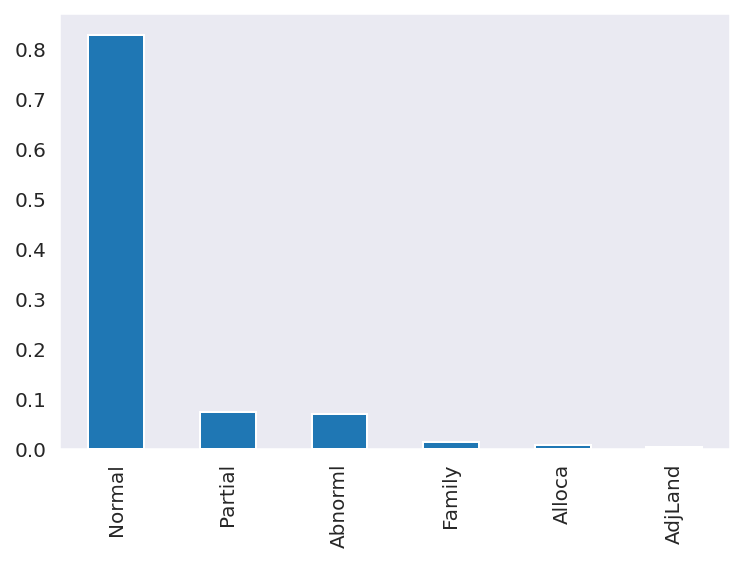

In [200]:
# see how much class imbalance is an issue
target_freq = train['salecondition'].value_counts(normalize=True)


target_freq.plot(kind='bar')
print('The abnormal class represents', round(target_freq['Abnorml'],4), 'of the data')

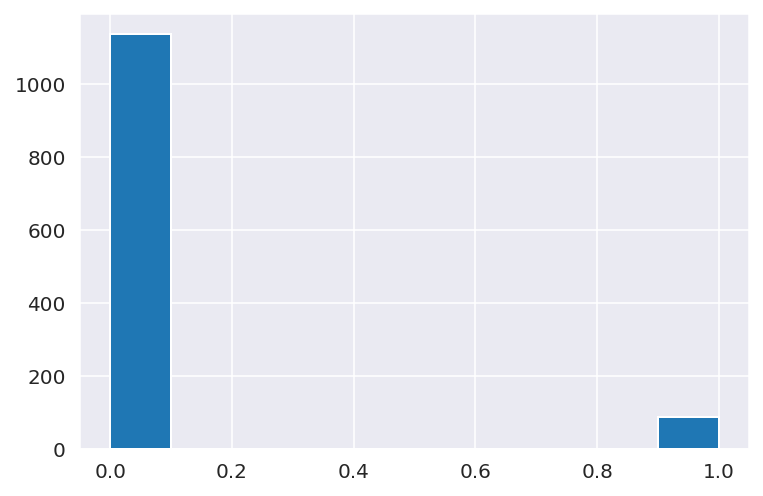

In [201]:
# map every salecondition that is not Abnorml to one class so that 
# I can treat it like a binary prediction problem
# my target is now abnormal sale in both my y test and y train 

y_train = train['salecondition'].map(lambda x: 1 if x =='Abnorml' else 0)
y_test = test['salecondition'].map(lambda x: 1 if x =='Abnorml' else 0)


y_train.hist()

In [202]:
y_train

Id
1       0
2       0
3       0
4       1
5       0
       ..
1453    0
1454    1
1455    0
1456    0
1460    0
Name: salecondition, Length: 1221, dtype: int64

In [0]:
#dropping salecondition from the features in my X train and X test data
X_train = X_train.drop('salecondition', axis=1)
X_test = X_test.drop('salecondition', axis=1)


In [204]:
#getting dummies
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_train.head()
X_train.shape

(1221, 222)

In [205]:
# even though I know my data is unballanced at the moment I want to see how it models as is
# keeping in mind that my accuracy scores can not be trusted
# By predicting the majority class, no matter the input the baseline model would have .93 accuracy
# this is the baseline on the non-ballanced data set

Baseline = 1- y_train.mean()
Baseline

0.9295659295659295

In [206]:
#checking to see if the shapes match up
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)


(166, 171)
(1221, 222)
(166,)
(1221,)


In [207]:
#executing fancy manuevers to add the removed vars back in as 0s for even stevens
additional = X_train.columns.difference(X_test.columns)
for x in additional:
  X_test[x] = 0
X_test = X_test[X_train.columns]

X_test.shape



(166, 222)

In [208]:
# I'm testing it on the unballanced data using logistic regression 
model = LogisticRegression()

model.fit(X_train,y_train)

#although I dont need to test my model because 
#I can assume it's not performing correctly becuase of the unblanced data
# I am chossing to still look at the features it ranks as having the most impact on sale condition 
# and then on abnormal sale specifically
y_hat = model.predict(X_test)

#I'm looking at the coeffs for each feature
coeffs = model.coef_

#looking at the crossval scores of my model to see how it performs with this unballanced data set
scores = cross_val_score(model, X_train, y_train, cv=5)
print(scores)
print(np.mean(scores))
print(coeffs)
# my model under these conditions is performing on average, the same as the baseline
# .92

[0.92653061 0.93032787 0.93442623 0.92622951 0.93032787]
0.9295684175309468
[[ 1.06011729e-03 -3.85234757e-05 -1.51033457e-04 -1.73064094e-04
  -5.86266653e-05 -3.33585577e-03 -4.13972990e-04 -1.93837430e-04
   7.67551218e-04 -2.65424655e-04  3.08289133e-04 -6.10188215e-05
  -6.39278417e-04  1.23405886e-03  5.33761623e-04 -3.49648767e-05
   2.60444014e-05 -6.88135252e-05 -1.25610142e-05  1.37937851e-05
   9.55770954e-06 -7.64425248e-05 -1.51269061e-04 -4.15123071e-04
  -2.14169004e-05 -7.37013886e-04 -5.22943309e-05  8.19717107e-04
   3.42565712e-03  1.61181907e-03  3.93837488e-03  1.52083248e-03
  -1.53511472e-03  2.20509030e-04  2.34811205e-03  3.52696451e-05
  -4.10551403e-05 -5.75367407e-06  3.05507554e-06  6.61594648e-06
  -4.62248327e-06 -6.22878372e-06 -2.56486223e-05  3.80920935e-06
   7.73479257e-06  9.78830303e-06  5.07193000e-06 -1.37435842e-05
  -2.46959980e-06 -7.25777899e-05  8.11492569e-07  1.61424640e-05
  -1.78862078e-06  2.22763120e-05 -1.91178723e-05  1.38688186e-05


In [209]:
X_test.columns

Index(['mssubclass', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt',
       'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf',
       ...
       'paveddrive_P', 'paveddrive_Y', 'saletype_CWD', 'saletype_Con',
       'saletype_ConLD', 'saletype_ConLI', 'saletype_ConLw', 'saletype_New',
       'saletype_Oth', 'saletype_WD'],
      dtype='object', length=222)

In [210]:
# I'm going to match all of the coeffs into a series which shows what features they are representing
from pandas import Series
from numpy.random import randn

labels = X_test.columns 
s = pd.Series(np.random.randn(222),index=labels)

print(s.sort_values(ascending=False))

# This unballanced logistic regression model ranks housestyle_1.5Unf, 
# neighborhood_Edwards, bldgtype_Twnhs, neighborhood_Crawfor, bsmtfullbath
# as having the best positive affect on abnormal
# and roofmatl_Roll, 3ssnporch, saletype_Con, enclosedporch, heating_GasW 
# as having the highest negative affect on abnormal

neighborhood_Gilbert    2.050235
garagecond_Fa           1.849855
condition2_PosN         1.741713
neighborhood_NAmes      1.723978
yearremodadd            1.701568
                          ...   
bsmtcond_Gd            -1.734604
bldgtype_TwnhsE        -1.916530
housestyle_SLvl        -2.391350
neighborhood_NoRidge   -3.211862
mszoning_RH            -3.397958
Length: 222, dtype: float64


In [211]:
# as I mentioned above I am looking into the model deeper 
# the cross val score was .92
# I am now examining the precision of this model
# I can see that the high accuracy score was misleading as it was only able to predict other and never abnormal

y_hat = cross_val_predict(model, X_test, y_test, cv=5)

target_names = ['Other', 'Abnormal']
print(classification_report(y_test, y_hat, target_names=target_names))


              precision    recall  f1-score   support

       Other       0.94      0.97      0.96       157
    Abnormal       0.00      0.00      0.00         9

    accuracy                           0.92       166
   macro avg       0.47      0.48      0.48       166
weighted avg       0.89      0.92      0.90       166



In [212]:
# I'm going to oversample in order to get more accurate results
# using RandomUnderSampler

ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train)

print(X_train_ros.shape[0] - X_train.shape[0], 'new random picked points')


1049 new random picked points


In [213]:
# now I am running my model again with resampled data

model = LogisticRegression()

model.fit(X_train_ros,y_train_ros)

#although I dont need to test my model because 
#I can assume it's not performing correctly becuase of the unblanced data
# I am chossing to still look at the features it ranks as having the most impact on sale condition 
# and then on abnormal sale specifically
y_hat = model.predict(X_test)

#I'm looking at the coeffs for each feature
coeffs = model.coef_

#looking at the crossval scores of my model to see how it performs with this ballanced data set
scores = cross_val_score(model, X_train_ros, y_train_ros, cv=5)
print(scores)
print(np.mean(scores))
print(coeffs)

# these are much more realistic scores, that I can trust, now that I've resampled my data

[0.62114537 0.61894273 0.59251101 0.63876652 0.61894273]
0.6180616740088105
[[ 4.50506849e-04 -5.67101523e-05 -2.08548594e-04 -2.26126716e-04
   2.39314625e-04 -3.54360489e-03 -5.58693162e-04 -2.17317456e-04
   8.74024521e-04 -2.49062050e-04  4.07645014e-04  7.04729723e-05
  -4.15784901e-04  7.74398520e-04  4.29086592e-04 -3.11732151e-05
   2.80309494e-05 -5.73145601e-05 -2.02416070e-05  4.25389268e-05
   2.40417169e-05 -4.29608993e-05 -2.07773595e-04 -5.75601094e-04
  -2.54585924e-05 -5.84583573e-04 -2.48805791e-04 -4.03652462e-05
   3.35846371e-03  2.19815174e-03  4.65602333e-03  3.91148460e-04
  -2.49617472e-03  2.28958513e-04  3.70196835e-03  4.38567036e-05
  -3.62055515e-05 -2.24494229e-05  3.84374686e-06  8.53708532e-06
  -6.33004044e-06  6.59330766e-06 -3.43588720e-05  6.29290537e-06
   2.33845884e-05  1.04415080e-05 -3.57357982e-06 -2.44886658e-05
  -3.62054823e-06 -1.08813023e-04 -6.16810440e-07  2.40227919e-05
  -2.34399289e-06  2.58341529e-05 -3.09150104e-05  1.71607207e-05


In [214]:
# I'm going to match all of the coeffs into a series which shows what features they are representing
# curios to know if fifferent features are selected now that I have balanced my data

labels = X_test.columns 
s = pd.Series(np.random.randn(222),index=labels)

print(s.sort_values(ascending=False))

# This balanced logistic regression model ranks kitchenqual_TA  , 
# exterior2nd_MetalSd , exterior1st_Plywood, utilities_NoSeWa , roofstyle_Gable
# as having the best positive affect on abnormal
# and neighborhood_StoneBr, functional_Min1, condition1_PosN , overallcond , exterior2nd_CBlock 
# as having the highest negative affect on abnormal
# it has given me completely different results!

garagefinish_RFn       3.070116
condition1_Norm        2.874689
functional_Min1        1.978415
garagetype_Attchd      1.831361
bsmtfintype1_Unf       1.807637
                         ...   
condition2_RRAn       -2.002446
bsmtfintype2_Rec      -2.024972
exterior1st_Plywood   -2.146506
exterior2nd_CmentBd   -2.371120
garagetype_Basment    -2.706431
Length: 222, dtype: float64


In [0]:
#now that my samples sizes are equal, my new baseline is .5 
#and my model was able to more accurately predict a higher mean score

In [0]:
# out of curiosity now I will do
# feature selection using Random Forest Classifier 
# and see if it thinks the the same features impact the model the most
# as logistic regression does.
# Again I will look at pre and post- balancing results

In [0]:
# Create a list of feature names
feat_labels = X_test.columns.tolist()

# specify X from the features
X = X_train

# specify y target
y = y_train

In [218]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X, y)

feature_importance = sorted(zip(feat_labels, clf.feature_importances_), key = lambda x: x[1])[::-1]

most_important_features = [x for x,y in feature_importance[:10]]

# print the 10 most important features
for feature in most_important_features[:10]:
  print(feature, 'has top 10 importance')

# Again I have another quite unique list



lotarea has top 10 importance
grlivarea has top 10 importance
saletype_WD has top 10 importance
1stflrsf has top 10 importance
garageyrblt has top 10 importance
bsmtunfsf has top 10 importance
mosold has top 10 importance
yearbuilt has top 10 importance
totalbsmtsf has top 10 importance
garagearea has top 10 importance


In [0]:
# Okay, one more thing!
# Let's see what else Random Forest Classifier can do when he feed her balanced data!

# Create a list of feature names
feat_labels = X_test.columns.tolist()

# specify X from the features
X = X_train_ros

# specify y target
y = y_train_ros



In [220]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X, y)

feature_importance = sorted(zip(feat_labels, clf.feature_importances_), key = lambda x: x[1])[::-1]

most_important_features = [x for x,y in feature_importance[:10]]

# print the 10 most important features
for feature in most_important_features[:10]:
  print(feature, 'has top 10 importance')

# This time there is a lot of cross over pre- and post rebalance
# it's the same

saletype_WD has top 10 importance
yearremodadd has top 10 importance
garageyrblt has top 10 importance
bsmtunfsf has top 10 importance
lotarea has top 10 importance
garagearea has top 10 importance
totalbsmtsf has top 10 importance
yearbuilt has top 10 importance
1stflrsf has top 10 importance
grlivarea has top 10 importance
